In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# import the first dataset
file = 'D:/Springboard_DataCamp/data/MachineLearning_with_the_Experts_SchoolBudgets/TrainingData_v1.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
11890,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,SALARIES OF REGULAR EMPLOYEES,...,NaN,PERSONNEL-PAID LEAVE,-0.024490,NON-PROJECT,NaN,"CRAFTS, TRADES, AND SERVICES",NaN,STAFF SERVICES,NaN,CENTRAL
251131,Teacher Compensation,Instruction,School Reported,School,Special Education,Teacher,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF REGULAR EMPLOYEES,...,NaN,NaN,-0.022645,SPECIAL ED. - MILD/MODERATE,NaN,PROFESSIONAL-INSTRUCTIONAL,-1279.639890,SPECIAL EDUCATION-HD HIGH,NaN,SPECIAL EDUCATION
169065,Teacher Compensation,Instruction,School on Central Budgets,Non-School,PreK,Teacher,Base Salary/Compensation,PreK,PreK-12 Operating,SALARIES OF PART TIME EMPLOYEE,...,NaN,EARLY CHILDHOOD EDUCATION,-0.020676,TUITION BASED - ECE,NaN,PROFESSIONAL-OTHER,-966.621829,SUPPORT SERVICES-INSTRUCTIONAL,NaN,INSTRUCTIONAL STAFF
111271,Special Population Program Management & Support,ISPD,Leadership & Management,Non-School,ELL,Other,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF PART TIME EMPLOYEE,...,NaN,ENGLISH FOR SPEAKERS OF OTHER,-0.020012,ELA S - TEACHING SPANISH ONLY,NaN,OFFICE/ADMINISTRATIVE SUPPORT,-595.654318,SUPPORT SERVICES-INSTRUCTIONAL,NaN,INSTRUCTIONAL STAFF
29425,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,NO_LABEL,PreK-12 Operating,SALARIES OF REGULAR EMPLOYEES,...,NaN,NaN,-0.018115,ALL DAY KINDERGARTEN,NaN,PROFESSIONAL-INSTRUCTIONAL,-869.659820,GENERAL ELEMENTARY EDUCATION,NaN,REGULAR INSTRUCTION


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400061 entries, 11890 to 415831
Data columns (total 25 columns):
Function                  400061 non-null object
Use                       400061 non-null object
Sharing                   400061 non-null object
Reporting                 400061 non-null object
Student_Type              400061 non-null object
Position_Type             400061 non-null object
Object_Type               400061 non-null object
Pre_K                     400061 non-null object
Operating_Status          400061 non-null object
Object_Description        375277 non-null object
Text_2                    88131 non-null object
SubFund_Description       306685 non-null object
Job_Title_Description     292571 non-null object
Text_3                    109077 non-null object
Text_4                    53745 non-null object
Sub_Object_Description    91599 non-null object
Location_Description      162008 non-null object
FTE                       125855 non-null float64
Funct

## Summarizing the data
You can use df.info() to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called **`FTE`** and **`Total.`**

- **`FTE`**: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.

- **`Total`**: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.

                 FTE         Total
count  125855.000000  3.955100e+05
mean        0.419847  1.306296e+04
std         0.451720  3.683061e+05
min        -0.024490 -8.746631e+07
25%         0.000619  7.367826e+01
50%         0.130000  4.605700e+02
75%         1.000000  3.631327e+03
max         1.047722  1.297000e+08


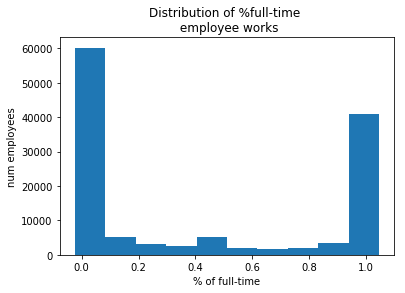

In [8]:
# Print the summary statistics
print(df.describe())

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

## Exploring datatypes in pandas
It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be involved. Towards that end, let's explore what we have.

Your job is to look at the DataFrame attribute .dtypes in the IPython Shell, and call its .value_counts() method in order to answer the question below.

Make sure to call df.dtypes.value_counts(), and not df.value_counts()! Check out the difference in the Shell. df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

How many columns with dtype object are in the data?

In [9]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

## Encode the labels as categorical variables
Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient **`object`** type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called **`LABELS`**. 

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the **`.astype()`** method.

Note: **`.astype()`** only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the **`.apply()`** method and provide a **`lambda`** function called **`categorize_label`** that applies **`.astype()`** to each column, x.

In [11]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


## Counting unique labels
There are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

pandas provides a **`pd.Series.nunique`** method for counting the number of unique values in a Series.

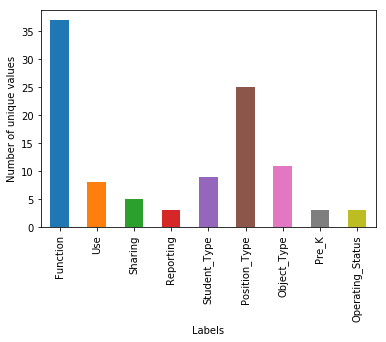

In [12]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

## Computing log loss with NumPy
To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss(), which Peter showed you in the video.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the **`compute_log_loss(predicted_values, actual_values)`**. It takes the predicted values as the first argument and the actual values as the second argument.

In [18]:
# Create log loss function
def compute_log_loss(predicted, actual, eps=1e-14):
 """ Computes the logarithmic loss between predicted and
 actual when these are 1D arrays.

 :param predicted: The predicted probabilities as floats between 0-1
 :param actual: The actual binary labels. Either 0 or 1.
 :param eps (optional): log(0) is inf, so we need to offset our
 predicted values slightly by eps from 0 or 1.
 """
 predicted = np.clip(predicted, eps, 1 - eps)
 loss = -1 * np.mean(actual * np.log(predicted)
 + (1 - actual)
 * np.log(1 - predicted))

 return loss

In [17]:
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])

In [19]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: ", correct_confident) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 

Log loss, correct and confident:  0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


 Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models.